In [1]:
#clean/preprocess data: fill in missing values with mean, gen dummy variables from categorical "one hot encoding"
#identify and deal with outlier values (exclude from dataset) anything outside of 1.5-2x IQR (don't use stds because assumes normality; this data is not necessarily normal)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

In [3]:
from scipy import stats
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import collections 
from sklearn.decomposition import PCA, FastICA, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics  
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
import visuals as vs

In [5]:
df = pd.read_csv('US_Dialysis_03122019.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (26,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,ProviderGroup,Owner,Ownership,ManagingGroup,DVA-JV,RCG_ID,medicareNbr,NPI,VSA_ID,ServiceArea,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,FMC,Fresenius Kidney Care,NaN,NaN,NaN,R08218,22510,1.639554e+09,358,Alaska,...,0.0,0,0,0,0,0,8,21,22,0
1,independent_Chain,Liberty Dialysis / AD Partners II LLC,NaN,NaN,NaN,R08043,22509,1.316207e+09,358,Alaska,...,0.0,0,2,41,63,89,115,128,133,0
2,FMC,Fresenius Kidney Care,NaN,NaN,NaN,R00146,22500,1.770696e+09,358,Alaska,...,228.0,197,187,160,151,146,129,110,111,0
3,FMC,Fresenius Kidney Care,NaN,NaN,NaN,R00150,22505,1.780866e+09,358,Alaska,...,0.0,0,0,0,0,0,0,0,0,0
4,independent_Chain,Liberty Dialysis / Alaska Investment Partners LLC,JV,NaN,NaN,R00151,22506,1.841469e+09,358,Alaska,...,79.0,103,124,137,139,142,153,163,174,0


In [7]:
df.drop(df.columns[[1,2,3,4,5,6,7,9,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,28,29,30,31,32,33,35,39,40,41,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,169,170,171,172,174,175,176,177,178,179,180,181,182,183,184]], axis=1, inplace=True)
#list(df)
#df.dtypes




In [8]:
df.head()


,ProviderGroup,VSA_ID,OperatingStatus,Group,Facility Nbr,QIP_Score_2016,Five_Star_2017,Patient_Experience_2017,Stations,HD,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,FMC,358,Freestanding,NaN,1,No Score,4.0,NaN,7.0,True,...,0.0,0,0,0,0,0,8,21,22,0
1,independent_Chain,358,Freestanding,NaN,2,56,5.0,4.0,16.0,True,...,0.0,0,2,41,63,89,115,128,133,0
2,FMC,358,Freestanding,NaN,3,74,3.0,4.0,35.0,True,...,228.0,197,187,160,151,146,129,110,111,0
3,FMC,358,Closed,NaN,4,NaN,NaN,NaN,0.0,False,...,0.0,0,0,0,0,0,0,0,0,0
4,independent_Chain,358,Freestanding,NaN,5,72,5.0,5.0,18.0,True,...,79.0,103,124,137,139,142,153,163,174,0


In [9]:
#len(df)
df=df[df.ProviderGroup == 'DaVita']
#len(df)


In [10]:
df.drop(df.columns[[0,1,
]], axis=1, inplace=True)

In [11]:
opkeep = []
opkeep=['Freestanding','internal - At Home','internal - Acute Programs','Freestanding Home','deNovo','COO','internal - PD Programs']
#print (opkeep)            


In [12]:
df=df[df['OperatingStatus'].isin(opkeep)]
#len(df)

In [13]:
df.dtypes
#QIP_Score_2016 is an object and shouldn't be; 

OperatingStatus             object
Group                       object
Facility Nbr                 int64
QIP_Score_2016              object
Five_Star_2017             float64
Patient_Experience_2017    float64
Stations                   float64
HD                            bool
PD                            bool
HHD                           bool
Nocturnal                     bool
Evening                       bool
19_deNovo                     bool
19_Acq                        bool
19_Operating                  bool
Type                        object
2005                       float64
2006                       float64
2007                       float64
2008                       float64
2009                       float64
2010                       float64
2011                         int64
2012                         int64
2013                         int64
2014                         int64
2015                         int64
2016                         int64
2017                

In [14]:
df.QIP_Score_2016.unique()
df.loc[df.QIP_Score_2016 == "No Score",'QIP_Score_2016']=np.nan
df["QIP_Score_2016"] = pd.to_numeric(df["QIP_Score_2016"])

In [15]:
df.dtypes


OperatingStatus             object
Group                       object
Facility Nbr                 int64
QIP_Score_2016             float64
Five_Star_2017             float64
Patient_Experience_2017    float64
Stations                   float64
HD                            bool
PD                            bool
HHD                           bool
Nocturnal                     bool
Evening                       bool
19_deNovo                     bool
19_Acq                        bool
19_Operating                  bool
Type                        object
2005                       float64
2006                       float64
2007                       float64
2008                       float64
2009                       float64
2010                       float64
2011                         int64
2012                         int64
2013                         int64
2014                         int64
2015                         int64
2016                         int64
2017                

In [16]:
#preprocess data
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    #create an index over X, put it into output
    for col, col_data in X.iteritems():       
        if col_data.dtype == bool:
            col_data=col_data*1
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col) 
        # Collect the revised columns
        output = output.join(col_data)   
    #print "output type ", type(output)
    #output.info()
    #replace missing values with respective column means
    output = output.apply(lambda x: x.fillna(x.mean()),axis=0)

    #output.info()
    return output

df_clean = preprocess_features(df)


In [17]:
df_clean.head()


,OperatingStatus_COO,OperatingStatus_Freestanding,OperatingStatus_Freestanding Home,OperatingStatus_deNovo,OperatingStatus_internal - Acute Programs,OperatingStatus_internal - At Home,OperatingStatus_internal - PD Programs,Group_APEX,Group_Dream Team,Group_Polaris,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,14,12,19,23,23,0,0
15,0,1,0,0,0,0,0,0,0,0,...,0.0,0,19,19,18,17,18,14,0,0
16,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,4,13,10,13,16,0,0
17,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,5,10,0,0
18,0,0,0,0,0,1,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [18]:
df_clean.dtypes


OperatingStatus_COO                            uint8
OperatingStatus_Freestanding                   uint8
OperatingStatus_Freestanding Home              uint8
OperatingStatus_deNovo                         uint8
OperatingStatus_internal - Acute Programs      uint8
OperatingStatus_internal - At Home             uint8
OperatingStatus_internal - PD Programs         uint8
Group_APEX                                     uint8
Group_Dream Team                               uint8
Group_Polaris                                  uint8
Group_Team Avanti                              uint8
Group_Team Endeavor                            uint8
Group_Team Fusion                              uint8
Group_Team Galaxy                              uint8
Group_Titan                                    uint8
Group_Trailblazers                             uint8
Facility Nbr                                   int64
QIP_Score_2016                               float64
Five_Star_2017                               f

In [19]:
df_clean.columns=df_clean.columns.values.tolist()
print (df_clean.columns)


Index(['OperatingStatus_COO', 'OperatingStatus_Freestanding',
       'OperatingStatus_Freestanding Home', 'OperatingStatus_deNovo',
       'OperatingStatus_internal - Acute Programs',
       'OperatingStatus_internal - At Home',
       'OperatingStatus_internal - PD Programs', 'Group_APEX',
       'Group_Dream Team', 'Group_Polaris', 'Group_Team Avanti',
       'Group_Team Endeavor', 'Group_Team Fusion', 'Group_Team Galaxy',
       'Group_Titan', 'Group_Trailblazers', 'Facility Nbr', 'QIP_Score_2016',
       'Five_Star_2017', 'Patient_Experience_2017', 'Stations', 'HD', 'PD',
       'HHD', 'Nocturnal', 'Evening', '19_deNovo', '19_Acq', '19_Operating',
       'Type_Metropolitan', 'Type_Micropolitan', 'Type_RURAL', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')


In [20]:
#create new dataframe with clean IQR columns, operate on all columns, update old data by merging new with old dataframe
#outlier flag in new columns, or new column with any outlier flag
#replace with absolute max rather than deleting old row
df_new=df_clean[['Facility Nbr','QIP_Score_2016','Patient_Experience_2017', 'Stations']]
df_new.head()

,Facility Nbr,QIP_Score_2016,Patient_Experience_2017,Stations
10,11,65.000000,3.315713,10.0
15,16,95.000000,3.315713,10.0
16,17,76.000000,3.315713,10.0
17,18,63.677593,3.315713,3.0
18,19,63.677593,3.315713,0.0


In [21]:
import collections 
# create an empty dictionary
outlier_dict = {}
#outlier_array=[]
# For each feature find the data points with extreme high or low values
for feature in df_new.columns:
    print(feature)
    if feature=='Facility Nbr':
        continue    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df_new[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df_new[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    #c = collections.Counter(log_data[~((df_new[feature] >= Q1 - step) & (df_new[feature] <= Q3 + step))])
    #print c
    # Display the outliers
    #print (""Data points considered outliers for the feature '{}':.format(feature))
    #create an outlier dataframe
    outlier_data = df_new[~((df_new[feature] >= Q1 - step) & (df_new[feature] <= Q3 + step))]
    print(outlier_data.shape)
    #subset the outlier data using only that column, facility number is the key
    outlier_data = outlier_data[['Facility Nbr', feature]]
    display(outlier_data)
    #add column to dictonary
    outlier_dict[feature]


Facility Nbr
QIP_Score_2016
(1156, 4)


,Facility Nbr,QIP_Score_2016
15,16,95.0
16,17,76.0
25,26,88.0
28,29,38.0
35,36,50.0
42,43,93.0
49,50,50.0
56,57,72.0
59,60,53.0
64,65,35.0


KeyError: 'QIP_Score_2016'

In [22]:
copy = df_clean

outlier_dict.keys()
outlier_dict.values()

for key_name in outlier_dict.keys():
    print(key_name)
    df_to_merge = outlier_dict[key_name]
    copy = pd.merge(copy, df_to_merge, how='left', on='Facility Nbr')
    




In [23]:
#copy.head()
#copy.columns=copy.columns.values.tolist()
#print (copy.columns)
copy.drop(copy.columns[[16]], axis=1, inplace=True)
copy.columns=copy.columns.values.tolist()
print (copy.columns)

Index(['OperatingStatus_COO', 'OperatingStatus_Freestanding',
       'OperatingStatus_Freestanding Home', 'OperatingStatus_deNovo',
       'OperatingStatus_internal - Acute Programs',
       'OperatingStatus_internal - At Home',
       'OperatingStatus_internal - PD Programs', 'Group_APEX',
       'Group_Dream Team', 'Group_Polaris', 'Group_Team Avanti',
       'Group_Team Endeavor', 'Group_Team Fusion', 'Group_Team Galaxy',
       'Group_Titan', 'Group_Trailblazers', 'QIP_Score_2016', 'Five_Star_2017',
       'Patient_Experience_2017', 'Stations', 'HD', 'PD', 'HHD', 'Nocturnal',
       'Evening', '19_deNovo', '19_Acq', '19_Operating', 'Type_Metropolitan',
       'Type_Micropolitan', 'Type_RURAL', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019'],
      dtype='object')


In [24]:
#fit to 5 components for elbow plot
copy_pca_elbow = PCA(n_components=5).fit(copy)
trans_copy_pca_elbow = copy_pca_elbow.transform(copy)


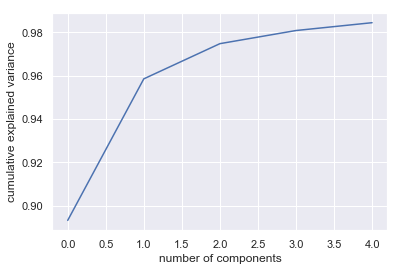

In [25]:
pca = PCA().fit(copy)
plt.plot(np.cumsum(copy_pca_elbow.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### The part I'm really struggling with is below.

In [26]:
#fit to 2 components 
pca = PCA(n_components=2)
pca.fit(copy)
#transform the copied data using the PCA fit above
trans_copy_pca = pca.transform(copy)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(trans_copy_pca, columns = ['Dimension 1', 'Dimension 2'])
#print(reduced_data.head)

In [27]:
print (copy)
print (trans_copy_pca)

      OperatingStatus_COO  OperatingStatus_Freestanding  \
10                      0                             1   
15                      0                             1   
16                      0                             1   
17                      0                             0   
18                      0                             0   
23                      0                             0   
24                      0                             1   
25                      0                             1   
26                      0                             0   
27                      0                             0   
28                      0                             1   
33                      0                             1   
35                      0                             1   
39                      0                             1   
40                      0                             0   
42                      0                             1 

Text(0, 0.5, 'PCA 2')

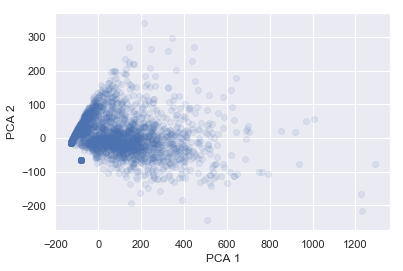

In [47]:
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], alpha=.1, c='b')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

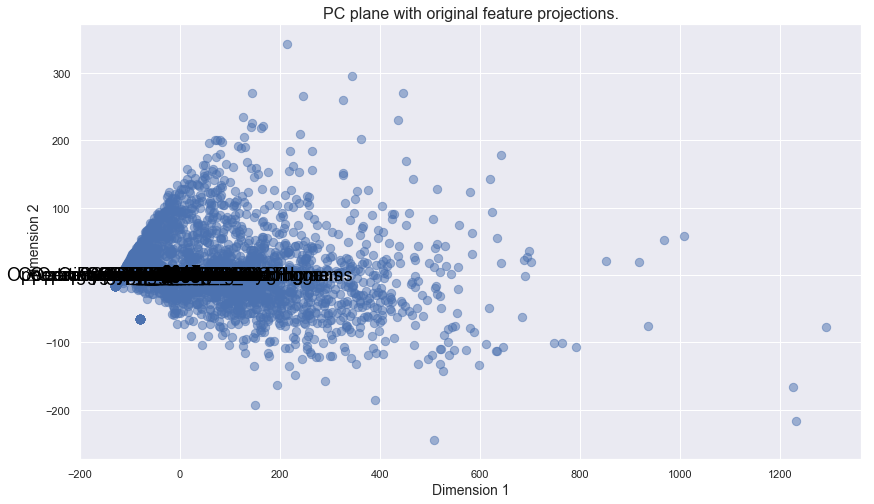

In [29]:
# Create a biplot
vs.biplot(copy, reduced_data, pca)

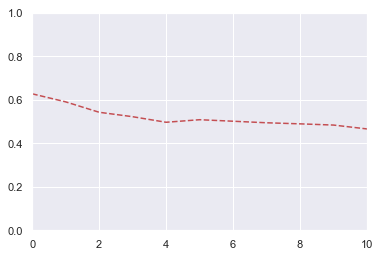

In [30]:
#create K-means clustering function
def kmeans_clusters(num, data):
    #assign k means fit function to kmeans name
    kmeans = KMeans(n_clusters=num, random_state=0).fit(data)
    #predict data into k means clusters
    kmeans_preds = kmeans.predict(data)
    kmeans_centers = kmeans.cluster_centers_
    kmeans_score = metrics.silhouette_score(data, kmeans_preds)
    return kmeans_score


df_kmeans_scores = []

for i in range(0,20):    
    df_kmeans_scores.append(kmeans_clusters(i+2, copy))

    
plt.plot(df_kmeans_scores, 'r--')
plt.axis([0,10,0,1])
plt.show()

In [63]:
#fit the initial data with k means
kmeans=KMeans(n_clusters=5).fit(copy)
clustered_facilities=kmeans.fit_predict(copy)
print(clustered_facilities)

[0 0 0 ... 3 0 1]


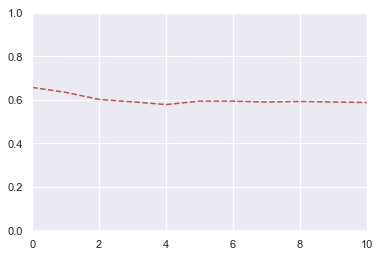

In [64]:
df_kmeans_scores_pca = []

for i in range(0,20):    
    df_kmeans_scores_pca.append(kmeans_clusters(i+2, trans_copy_pca))

    
plt.plot(df_kmeans_scores_pca, 'r--')
plt.axis([0,10,0,1])
plt.show()

In [68]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	#ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	 #          s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number");


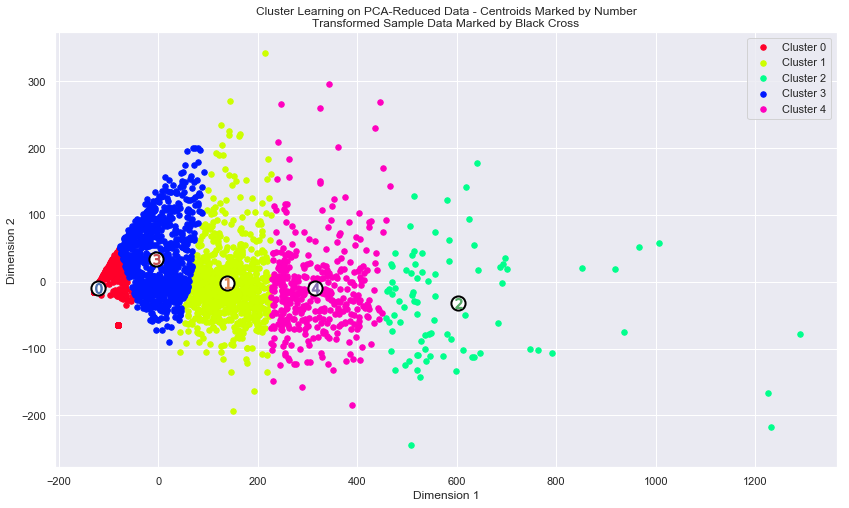

In [69]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=5, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(copy, preds)

kmeans_clusters (5,reduced_data)

cluster_results(reduced_data, preds, centers)